## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?
Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf).
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

In [ ]:
# your answer here
# libraries to be used
# import poisson from scipy
from scipy.stats import poisson, chi2

# importnumpy as np
import numpy as np

# import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
# Observed frequencies
observed_frequencies = np.array([35, 99, 104, 110, 62, 25, 10, 3])

# Sample mean parameter (lambda)
sample_mean_parameter = 2.435

# Calculate expected frequencies using the Poisson PMF - as in the article
total_observations = np.sum(observed_frequencies)
expected_frequencies = np.array([total_observations * poisson.pmf(k, sample_mean_parameter) for k in range(8)])
expected_frequencies[7] = total_observations - np.sum(expected_frequencies[:7])

In [ ]:
# Calculate the chi-squared test statistic
chi_squared_stat = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)

# Degrees of freedom
degrees_of_freedom = len(observed_frequencies) - 1

# Significance level
alpha = 0.05

In [ ]:
# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

# Compare the test statistic to the critical value. #sintaxis I found in stackoverflow on how to state the results
if chi_squared_stat > critical_value:
    print("Reject the null hypothesis: There's reason to believe that the number of scores is not a Poisson variable.")
else:
    print("Fail to reject the null hypothesis: There's no significant evidence to conclude that the number of scores is not a Poisson variable.")

Fail to reject the null hypothesis: There's no significant evidence to conclude that the number of scores is not a Poisson variable.


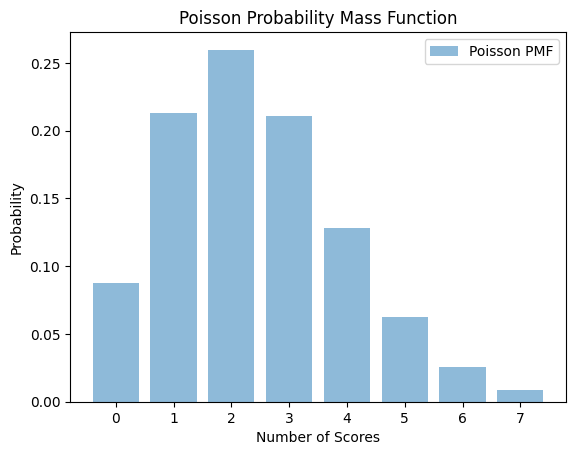

In [ ]:
# Create a Poisson PMF plot. Not sure if required but I did it to see how it looks.
k = np.arange(8)
pmf_values = poisson.pmf(k, sample_mean_parameter)

plt.bar(k, pmf_values, label='Poisson PMF', alpha=0.5)
plt.xlabel('Number of Scores')
plt.ylabel('Probability')
plt.title('Poisson Probability Mass Function')
plt.xticks(k)
plt.legend()
plt.show()

## Question 2
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table:

![](table4.png)

In [ ]:
#your answer here

# libraries to be used
# import poisson from scipy
from scipy.stats import chi2, chi2_contingency

# importnumpy as np
import numpy as np

In [ ]:
# Create contingency table
observed = np.array([[32, 12], [14, 12], [6, 9]])

# Perform a chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(observed)

# Set the significance level (alpha)
alpha = 0.05

In [ ]:
# Determine the critical value from the chi-squared distribution table
from scipy.stats import chi2
critical_value = chi2.ppf(1 - alpha, dof)

In [ ]:
# Print the observed table
print("Observed Contingency Table:")
print(observed)
print()

# Print the expected table
print("Expected Contingency Table (under the null hypothesis):")
print(expected)
print()

# Print the chi-squared test statistic
print(f"Chi-squared test statistic: {chi2}")
print()

# Print the degrees of freedom
print(f"Degrees of Freedom: {dof}")
print()

# Print the critical value
print(f"Critical Value: {critical_value}")
print()

Observed Contingency Table:
[[32 12]
 [14 12]
 [ 6  9]]

Expected Contingency Table (under the null hypothesis):
[[26.91764706 17.08235294]
 [15.90588235 10.09411765]
 [ 9.17647059  5.82352941]]

Chi-squared test statistic: <scipy.stats._continuous_distns.chi2_gen object at 0x7aa3254f3c10>

Degrees of Freedom: 2

Critical Value: 5.991464547107979



In [ ]:
# Perform the test
if chi2_stat > critical_value:
    print("Reject the null hypothesis: There is an association between patterns of physical activity and sugary drink consumption.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between patterns of physical activity and sugary drink consumption.")

Fail to reject the null hypothesis: There is no significant association between patterns of physical activity and sugary drink consumption.
